# Práctica Guiada: Multiple Correspondence Analysis

## Introducción

Multiple correspondence analysis (MCA) permite realizar el análisis de los patrones de relaciones entre diferentes varables categóricas.

Técnicamente, MCA se obtiene realizando el análisis de una matriz de indicadores (es decir, una matriz cuyas entradas son 0 y 1).

MCA es utilizado cuando es necesario analizar un set de observaciones descripta por un conjunto de variables categóricas. Cada variable contiene diversas categorías (por ejemplo, género (Masculino o Femenino), estado conyugal (casado, soltero, conviviente, etc.). Cada uno de las categorías de las variables son transformadas en una variable dummy de 0 y 1. En caso de que existan variables cuantitativas, también podría realizarse un "binning" de la variable.

Supongamos que queremos evaluare el efecto del tipo de barrica sobre algunos vinos. En este dataset, los vinos 1, 5 y 6 fueron añejados en el tipo "1" de barrica. Los vinos 2, 3 y 4, fueron añejados en el tipo 2. Luego, preguntamos a tres expertos que elijan tres de cinco variables posibles para describir los vinos. Para cada vino, cada experto lo rankeó de acuerdo a su intensidad. Algunas de las respuestas se codificaron de forma binaria ("frutal" vs. "no frutal") y otras en tres categorías ("algo de vainilla", "poco de vanilla" o "nada de vainilla"). 

Cada respuesta binaria está representada por dos columnas y cada respuesta tricotómica, por tres columnas.

Objetivos del análisis: 
    
   1. Obtener una "tipología de vinos"
   2. Entender si existe "acuerdo" entre las escalas utilizadas por los tres expertos

Vamos a usar el tipo de barrica como una variable suplementaria para "proyectar" sobre el análisis luego de realizado.

Previamente a comenzar van a tener que instalar el paquete necesario para poder correr los análisis. Para eso ejecuten en la terminal el siguiente comando:
    
    pip install git+https://github.com/esafak/mca
    

In [2]:
!pip install mca

  Running setup.py bdist_wheel for mca ... done
  Stored in directory: /home/facu_tk/.cache/pip/wheels/85/0d/24/fe459ababfb49e7669f16d9607247c055d25537c0f5c7c0d93
Successfully built mca


In [3]:
import mca
import pandas as pd
import numpy as np

### Preparamos los datos para trabajar

In [4]:
data = pd.read_table('../Data/burgundies.csv',
                     sep=',', skiprows=1, index_col=0, header=0)
X = data.drop('oak_type', axis=1)
j_sup = data.oak_type
i_sup = np.array([0, 1, 0, 1, 0, .5, .5, 1, 0, 1, 0, 0, 1, 0, .5, .5, 1, 0, .5, .5, 0, 1])
ncols = 10

X.shape, j_sup.shape, i_sup.shape

((6, 22), (6,), (22,))

In [5]:
src_index = (['Expert 1'] * 7 + ['Expert 2'] * 9 + ['Expert 3'] * 6)
var_index = (['fruity'] * 2 + ['woody'] * 3 + ['coffee'] * 2 + ['fruity'] * 2
             + ['roasted'] * 2 + ['vanillin'] * 3 + ['woody'] * 2 + ['fruity'] * 2
             + ['butter'] * 2 + ['woody'] * 2)
yn = ['y','n']; rg = ['1', '2', '3']; val_index = yn + rg + yn*3 + rg + yn*4
col_index = pd.MultiIndex.from_arrays([src_index, var_index, val_index], 
                                      names=['source', 'variable', 'value'])

table1 = pd.DataFrame(data=X.values, index=X.index, columns=col_index)
table1.loc['W?'] = i_sup
table1['','Oak Type',''] = j_sup

table1

source   Expert 1                                  Expert 2               \
variable   fruity      woody           coffee        fruity      roasted   
value           y    n     1    2    3      y    n        y    n       y   
Wine                                                                       
W1            1.0  0.0   0.0  0.0  1.0    0.0  1.0      1.0  0.0     0.0   
W2            0.0  1.0   0.0  1.0  0.0    1.0  0.0      0.0  1.0     1.0   
W3            0.0  1.0   1.0  0.0  0.0    1.0  0.0      0.0  1.0     1.0   
W4            0.0  1.0   1.0  0.0  0.0    1.0  0.0      0.0  1.0     1.0   
W5            1.0  0.0   0.0  0.0  1.0    0.0  1.0      1.0  0.0     0.0   
W6            1.0  0.0   0.0  1.0  0.0    0.0  1.0      1.0  0.0     0.0   
W?            0.0  1.0   0.0  1.0  0.0    0.5  0.5      1.0  0.0     1.0   

source     ...                        Expert 3                              \
variable   ...    vanillin woody        fruity      butter      woody        
value      ...           3     y    n        y    n      y    n     y    n   
Wine       ...                                                               
W1         ...         1.0   0.0  1.0      0.0  1.0    0.0  1.0   0.0  1.0   
W2         ...         0.0   1.0  0.0      0.0  1.0    1.0  0.0   1.0  0.0   
W3         ...         0.0   1.0  0.0      0.0  1.0    1.0  0.0   1.0  0.0   
W4         ...         0.0   1.0  0.0      1.0  0.0    1.0  0.0   1.0  0.0   
W5         ...         1.0   0.0  1.0      1.0  0.0    0.0  1.0   0.0  1.0   
W6         ...         0.0   0.0  1.0      1.0  0.0    0.0  1.0   0.0  1.0   
W?         ...         0.0   0.5  0.5      1.0  0.0    0.5  0.5   0.0  1.0   

source             
variable Oak Type  
value              
Wine               
W1            1.0  
W2            2.0  
W3            2.0  
W4            2.0  
W5            1.0  
W6            1.0  
W?            NaN  

[7 rows x 23 columns]

## Realizando un Multiple Correspondance Analysis

Creamos dos instancias de MCA: una con la corección de Benzécri y la otra sin. El parámetro `ncols` denota la cantidad de variables categóricas en la tabla.

In [6]:
mca_ben = mca.MCA(X, ncols=ncols)
mca_ind = mca.MCA(X, ncols=ncols, benzecri=False)

El atributo `L` de cada objeto contiene los autovalores (eigenvalues) o las "inercias" de los factores. El método `expl_var` devuelve la la inercia explicada de cada factor. A su vez `N` limita el número de factores mantenidos. 

In [7]:
data = {'Iλ': pd.Series(mca_ind.L),
        'τI': mca_ind.expl_var(greenacre=False, N=4),
        'Zλ': pd.Series(mca_ben.L),
        'τZ': mca_ben.expl_var(greenacre=False, N=4),
        'cλ': pd.Series(mca_ben.L),
        'τc': mca_ind.expl_var(greenacre=True, N=4)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ', 'τI', 'Zλ', 'τZ', 'cλ', 'τc']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2

,Iλ,τI,Zλ,τZ,cλ,τc
Factor,,,,,,
1,0.853210,0.711009,0.700402,0.982290,0.700402,0.951889
2,0.200000,0.166667,0.012346,0.017314,0.012346,0.016779
3,0.115114,0.095928,0.000282,0.000395,0.000282,0.000383
4,0.031676,0.026397,0.000000,0.000000,0.000000,0.000000
Σ,1.200000,1.000000,0.713030,1.000000,0.713030,0.969050


La inercia total es simplemente la suma de las inercias principales de cada factor.

In [8]:
mca_ind.inertia, mca_ind.L.sum() 

(1.1999999999999968, 1.1999999999999968)

In [9]:
mca_ben.inertia, mca_ben.L.sum()

(0.71302972718037605, 0.71302972718037605)

Tabulamos, nuevamente los autovalores y sus proporciones. Pero esta vez solamente nos quedamos con los dos primeros factores y los imprimimos como porcentaje.

In [10]:
data = np.array([mca_ben.L[:2], 
                 mca_ben.expl_var(greenacre=True, N=2) * 100]).T
df = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,3))
df

,cλ,%c
1,0.700402,95.188869
2,0.012346,1.677852


Los scores de cada factor, los cosenos al cuadrado y las contribuciones para cada observación son calculadas por los métodos `fs_r`, `cos_r` y `cont_r`, respectivamente. En este caso, el sufijo `_r` denota que se trata de las filas. Una vez, más, `N` limita el número de factores retenidos.

In [11]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000
#table3.loc[fs, 'W?'] = mca_ben.fs_r_sup(pd.DataFrame([i_sup]), N=2)[0]

np.round(table3.astype(float), 2)

Wine                        W1      W2      W3      W4      W5      W6
Factor score         1    0.86   -0.71   -0.92   -0.86    0.92    0.71
                     2    0.08   -0.16    0.08    0.08    0.08   -0.16
Squared cosines      1    0.99    0.95    0.99    0.99    0.99    0.95
                     2    0.01    0.05    0.01    0.01    0.01    0.05
Contributions x 1000 1  176.68  120.99  202.33  176.68  202.33  120.99
                     2   83.33  333.33   83.33   83.33   83.33  333.33

Los cálculos para cada columna (variables) son análogos a los de la fila.

In [12]:
table4 = pd.DataFrame(columns=col_index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
table4.loc[fs,  :] = mca_ben.fs_c(N=2).T
table4.loc[cos, :] = mca_ben.cos_c(N=2).T
table4.loc[cont,:] = mca_ben.cont_c(N=2).T * 1000

fs_c_sup = mca_ben.fs_c_sup(mca.dummy(pd.DataFrame(j_sup)), N=2)
table4.loc[fs, ('Oak', '', 1)] = fs_c_sup[0]
table4.loc[fs, ('Oak', '', 2)] = fs_c_sup[1]

np.round(table4.astype(float), 2)

source                 Expert 1                                             \
variable                 fruity         woody                coffee          
value                         y      n      1       2      3      y      n   
Factor score         1     0.90  -0.90  -0.97    0.00   0.97  -0.90   0.90   
                     2     0.00   0.00   0.18   -0.35   0.18   0.00  -0.00   
Squared cosines      1     1.00   1.00   0.97    0.00   0.97   1.00   1.00   
                     2     0.00   0.00   0.03    1.00   0.03   0.00   0.00   
Contributions x 1000 1    57.96  57.96  44.37    0.00  44.37  57.96  57.96   
                     2     0.00   0.00  83.33  333.33  83.33   0.00   0.00   

source                 Expert 2                 ...                Expert 3  \
variable                 fruity        roasted  ...   woody          fruity   
value                         y      n       y  ...       y      n        y   
Factor score         1     0.90  -0.90   -0.90  ...   -0.90   0.90     0.28   
                     2    -0.00   0.00    0.00  ...    0.00  -0.00    -0.00   
Squared cosines      1     1.00   1.00    1.00  ...    1.00   1.00     0.97   
                     2     0.00   0.00    0.00  ...    0.00   0.00     0.00   
Contributions x 1000 1    57.96  57.96   57.96  ...   57.96  57.96     5.56   
                     2     0.00   0.00    0.00  ...    0.00   0.00     0.00   

source                                                     Oak        
variable                     butter         woody                     
value                      n      y      n      y      n     1     2  
Factor score         1 -0.28  -0.90   0.90  -0.90   0.90  0.99 -0.99  
                     2  0.00   0.00  -0.00   0.00  -0.00  0.00 -0.00  
Squared cosines      1  0.97   1.00   1.00   1.00   1.00   NaN   NaN  
                     2  0.00   0.00   0.00   0.00   0.00   NaN   NaN  
Contributions x 1000 1  5.56  57.96  57.96  57.96  57.96   NaN   NaN  
                     2  0.00   0.00   0.00   0.00   0.00   NaN   NaN  

[6 rows x 24 columns]

### Graficando los resultados

Veamos una expresión gráfica de los resultados. Estos no aportan información nueva a las tablas anteriores pero permiten una visualización más clara.

#### Sobre filas (unidades)

Representamos la posición de cada fila (en este caso, cada uno de los seis vinos) en el espacio generado por los dos factores principales

In [13]:
def plot_factors_ind_mca(mca_object, X):
    
    ''' Plot individuals in two first factors of MCA Analysis Arguments:
        #################################################
        
        mca_objet: object with MCA model
        X: DataFrame with data
    '''
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    
    points = mca_object.fs_r(N=2).T
    labels = list(X.index)
    
    fig, ax = plt.subplots()
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    ax.scatter(points[0], points[1])
   
    for label, x, y in zip(labels, *points):
        plt.annotate(label, xy=(x, y))
    
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')

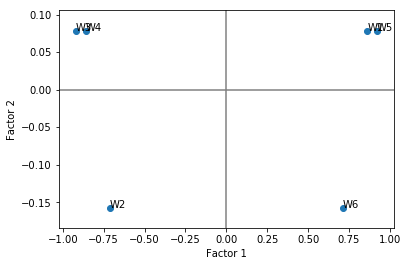

In [14]:
plot_factors_ind_mca(mca_ben, X)

#### Sobre columnas (variables)

Representamos la posición de cada columna (en este caso, agregadas para cada uno de los especialistas) en el espacio generado por los dos factores principales. Primero, veremos las categorías de las variables y luego analizarmeos las posiciones de los expertos consultados.

##### Sobre categorías de las variables

In [18]:
def plot_factors_vars_mca(mca_object, X):
    
    ''' Plot individuals in two first factors of MCA Analysis Arguments:
        #################################################
        
        mca_objet: object with MCA model
        X: DataFrame with data
    '''
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    
    points = mca_object.fs_c(N=2).T
    
    noise = 0.09 * (np.random.rand(*points.shape) - 0.6)
    points = noise + points
    labels = list(X.columns)
    
    fig, ax = plt.subplots()
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    ax.scatter(points[0], points[1])
   
    for label, x, y in zip(labels, *points):
        plt.annotate(label, xy=(x, y))
    
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')

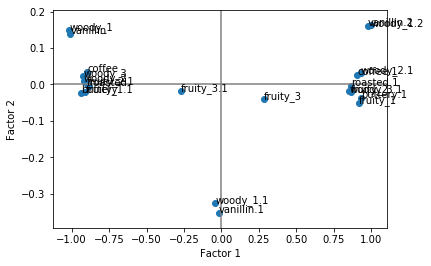

In [19]:
plot_factors_vars_mca(mca_ben, X)

##### Sobre expertos

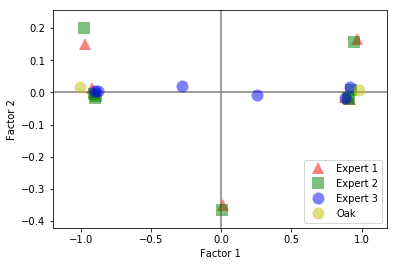

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

noise = 0.05 * (np.random.rand(*table4.T[fs].shape) - 0.5)
fs_by_source = table4.T[fs].add(noise).groupby(level=['source'])

fig, ax = plt.subplots()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
ax.margins(0.1)
markers = '^', 's', 'o', 'o'
colors = 'r', 'g', 'b', 'y'
for fscore, marker, color in zip(fs_by_source, markers, colors):
    label, points = fscore
    ax.plot(*points.T.values, marker=marker, color=color, label=label, linestyle='', alpha=.5, mew=0, ms=12)
ax.legend(numpoints=1, loc=4)
plt.show()

### Interpretando los resultados

La interpretación de PCA suele estar basada entre las proximidades entre puntos en un espacio de baja dimensionalidad (en este caso, 2 dimensiones). 

Cuando dos puntos -filas- están cerca quiere decir que tienden a presentar los mismos niveles en las variables analizadas.

Cuando dos variables están cerca es necesario diferenciar dos casos:

   - La proximidad entre niveles de diferentes variables nominales sugiere la aparición conjunta de esos niveles en las observaciones
   - La proximidad de niveles de la misma variable tienden a significar que los grupos de observaciones asociados con esos dos niveles tienden a ser similares.